<a href="https://colab.research.google.com/github/Luke-687/Chemotaxis-With-RL/blob/main/QLearningChemotaxisipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#Define all possible transitions in a Q table dictionary
import math
gamma = 0.75

def directionKey(direction):
  angle = direction*45
  return angle*math.pi/180

def moveForQTable(initX, initY, direction, velocity):
  direction = directionKey(direction)
  return [(initX + int(math.cos(direction)*velocity)),(initY + int(math.sin(direction)*velocity))]

def reward(x,y):
  reward=0
  fromCenter = math.sqrt((x-4.5)**2+(y-4.5)**2)
  if(fromCenter<3):
    reward = 10/fromCenter
  else:
    reward=-5
  return reward

def evalReward(x,y):
  fromCenter = math.sqrt((x-10)**2+(y-10)**2)
  if(fromCenter==0):
    reward = 1
  elif(fromCenter<=3):
    reward = 2
  else:
    reward=3

  return reward

Qtable = {}
for i1 in range(0,10):
  for j1 in range(0,10):
    for direction in range(0,8):
      for velocity in range(1,4):
        Qtable[((i1,j1),(direction, velocity))] = [reward(i1,j1), moveForQTable(i1,j1, direction, velocity)]

#Update Q table across 1000 iterations
for iterations in range(0,100):
  for x in range(0,10):
    for y in range(0,10):
      for direction in range(0,8):
        for velocity in range(1,4):
          #Find updated reward
          initReward = reward(x,y)
          newPos = Qtable[((x,y),(direction, velocity))][1]
          next_x = max(0, min(9, newPos[0]))
          next_y = max(0, min(9, newPos[1]))
          nextReward = max(
              Qtable[(next_x, next_y), (d,v)][0] # Corrected key format here
              for d in range(8)
              for v in range(1,4)
          )

          Qtable[((x,y),(direction, velocity))][0] = initReward + gamma*nextReward

In [28]:
print(Qtable)

{((0, 0), (0, 1)): [17.044212947899194, [1, 0]], ((0, 0), (0, 2)): [17.32116038535054, [2, 0]], ((0, 0), (0, 3)): [17.766504294495522, [3, 0]], ((0, 0), (1, 1)): [12.302353865045973, [0, 0]], ((0, 0), (1, 2)): [17.766504294495522, [1, 1]], ((0, 0), (1, 3)): [23.06980515339463, [2, 2]], ((0, 0), (2, 1)): [17.044212947899194, [0, 1]], ((0, 0), (2, 2)): [17.32116038535054, [0, 2]], ((0, 0), (2, 3)): [17.766504294495522, [0, 3]], ((0, 0), (3, 1)): [12.302353865045973, [0, 0]], ((0, 0), (3, 2)): [17.044212947899194, [-1, 1]], ((0, 0), (3, 3)): [17.32116038535054, [-2, 2]], ((0, 0), (4, 1)): [12.302353865045973, [-1, 0]], ((0, 0), (4, 2)): [12.302353865045973, [-2, 0]], ((0, 0), (4, 3)): [12.302353865045973, [-3, 0]], ((0, 0), (5, 1)): [12.302353865045973, [0, 0]], ((0, 0), (5, 2)): [12.302353865045973, [-1, -1]], ((0, 0), (5, 3)): [12.302353865045973, [-2, -2]], ((0, 0), (6, 1)): [12.302353865045973, [0, -1]], ((0, 0), (6, 2)): [12.302353865045973, [0, -2]], ((0, 0), (6, 3)): [12.3023538650

In [29]:
x=[]
y=[]
currentX = 0
currentY = 0

for steps in range(0,10):
  currentX = max(0, min(9, currentX))
  currentY = max(0, min(9, currentY))
  x.append(currentX)
  y.append(currentY)

  rewardOption = -100000
  currentX = int(currentX)
  currentY = int(currentY)
  nextPos = [currentX, currentY]

  for direction in range(0,8):
    for velocity in range(1,4):
      testReward = Qtable[(currentX, currentY), (direction, velocity)][0]
      if(testReward>=rewardOption):
        rewardOption = testReward
        nextPos = Qtable[(currentX, currentY), (direction, velocity)][1]
  currentX = nextPos[0]+random.random()
  currentY = nextPos[1]+random.random()

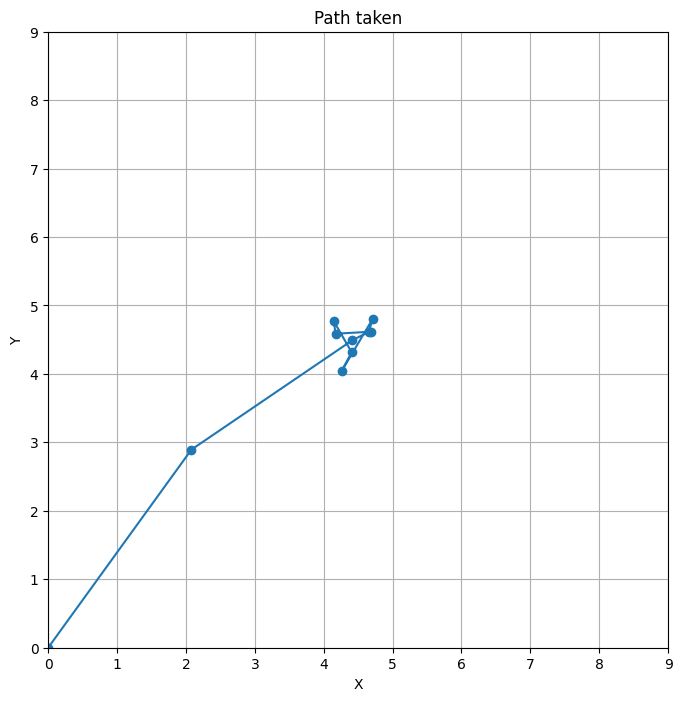

In [30]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(8, 8))
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Path taken')
plt.grid(True)
plt.xlim(0, 9)
plt.ylim(0, 9)
plt.xticks(range(10))
plt.yticks(range(10))
plt.show()